In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from keras.applications import vgg16
from tensorflow.keras.utils import load_img,img_to_array
#from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D


from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #, force_remount=True
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5

# count = 0
# for root, folders, filenames in os.walk('/kaggle/input'):
#    print(root, folders)

#!ls "/content/drive/My Drive/Dataset"

Mounted at /content/drive


In [3]:
imgs_path = "/content/drive/My Drive/Dataset/"
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("Total number of images:",len(files))

Total number of images: 2906


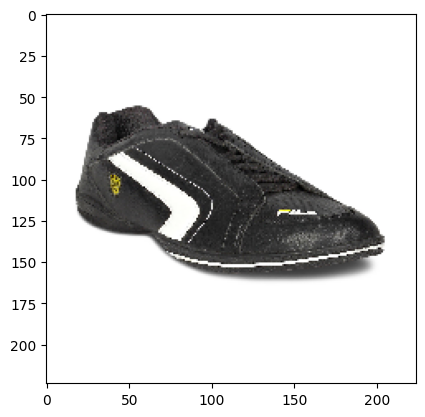

Image loaded successfully!


In [4]:
#For reducing compilation time of the algorithm, we reduce the data to 5000 images or the system crashes!
# files=files[0:5000]
# Testing feature extraction with one image
original = load_img(files[9], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Image loaded successfully!")

In [5]:
# # load the VGG16 model
# vgg_model = vgg16.VGG16(weights='imagenet')

# # remove the last layers in order to get features instead of predictions
# feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
# ------------------------------------------------------------------------------------------------------------------------------ #
# load the ResNet50 model
feat_extractor = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
feat_extractor.trainable = False

feat_extractor = tensorflow.keras.Sequential([
    feat_extractor,
    GlobalMaxPooling2D()
])

# print the layers of the CNN
feat_extractor.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
numpy_image = img_to_array(original)
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('Image Batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

Image Batch size (1, 224, 224, 3)


In [7]:
img_features = feat_extractor.predict(processed_image)

print("Features successfully extracted for one image!")
print("Number of image features:",img_features.size)
img_features

1/1 [==============================] - 1s 1s/step
Features successfully extracted for one image!
Number of image features: 2048


array([[1.175431 , 6.0378113, 4.505183 , ..., 0.8092209, 2.2588053,
        6.437543 ]], dtype=float32)

In [8]:
# Because the algorithm works for one image, it should work for a batch of images!
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [9]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

91/91 [==============================] - 587s 6s/step
features successfully extracted!


(2906, 2048)

In [10]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/drive/My Drive/Dataset/4576.jpg,/content/drive/My Drive/Dataset/5404.jpg,/content/drive/My Drive/Dataset/45603.jpg,/content/drive/My Drive/Dataset/47198.jpg,/content/drive/My Drive/Dataset/3797.jpg,/content/drive/My Drive/Dataset/44741.jpg,/content/drive/My Drive/Dataset/41233.jpg,/content/drive/My Drive/Dataset/40325.jpg,/content/drive/My Drive/Dataset/38653.jpg,/content/drive/My Drive/Dataset/4342.jpg,...,/content/drive/My Drive/Dataset/8326.jpg,/content/drive/My Drive/Dataset/5421.jpg,/content/drive/My Drive/Dataset/34007.jpg,/content/drive/My Drive/Dataset/2742.jpg,/content/drive/My Drive/Dataset/5423.jpg,/content/drive/My Drive/Dataset/5425.jpg,/content/drive/My Drive/Dataset/36217.jpg,/content/drive/My Drive/Dataset/38327.jpg,/content/drive/My Drive/Dataset/37584.jpg,/content/drive/My Drive/Dataset/37202.jpg
/content/drive/My Drive/Dataset/4576.jpg,1.000000,0.676535,0.677672,0.615249,0.688673,0.698662,0.722005,0.731304,0.753904,0.757978,...,0.578310,0.442961,0.450939,0.491194,0.516666,0.457597,0.478547,0.460952,0.549872,0.492261
/content/drive/My Drive/Dataset/5404.jpg,0.676535,1.000000,0.638346,0.642556,0.687529,0.741770,0.759655,0.755763,0.702437,0.670638,...,0.565361,0.433541,0.441067,0.530210,0.517014,0.459354,0.557115,0.450879,0.521758,0.484957
/content/drive/My Drive/Dataset/45603.jpg,0.677672,0.638346,1.000000,0.765370,0.627520,0.689344,0.645443,0.618743,0.763607,0.772081,...,0.500411,0.395175,0.490884,0.461196,0.542171,0.450123,0.547814,0.462607,0.503422,0.514744
/content/drive/My Drive/Dataset/47198.jpg,0.615249,0.642556,0.765370,1.000000,0.592374,0.611545,0.643295,0.582071,0.704528,0.728739,...,0.503276,0.394260,0.440450,0.476252,0.510988,0.444883,0.534269,0.440690,0.521673,0.502393
/content/drive/My Drive/Dataset/3797.jpg,0.688673,0.687529,0.627520,0.592374,1.000000,0.734099,0.724390,0.715222,0.711531,0.675216,...,0.574983,0.449782,0.504772,0.587529,0.519390,0.476677,0.574062,0.516061,0.555587,0.534062


In [11]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


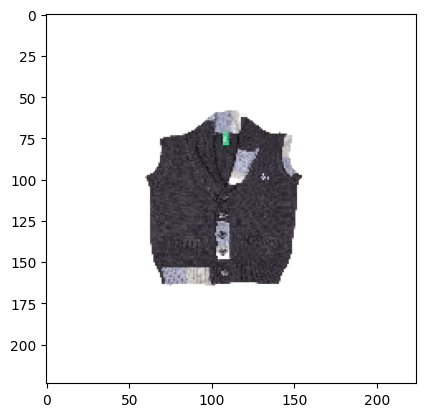

-----------------------------------------------------------------------
most similar products:


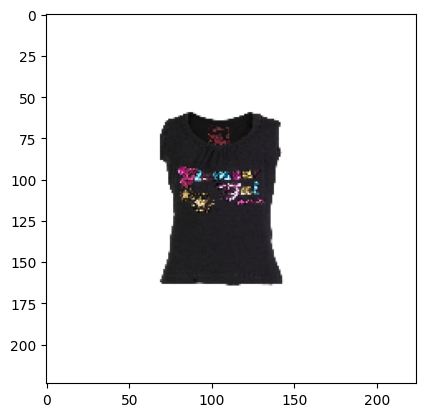

similarity score :  0.7762619


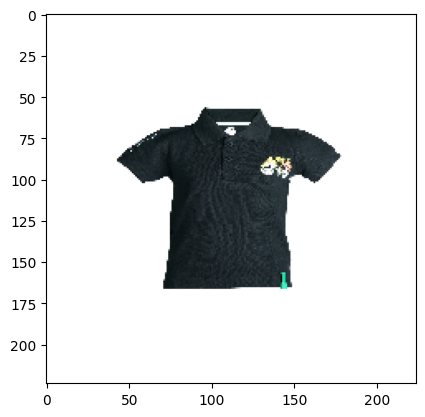

similarity score :  0.7724708


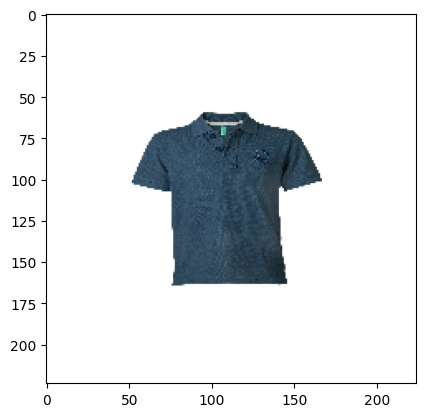

similarity score :  0.768277


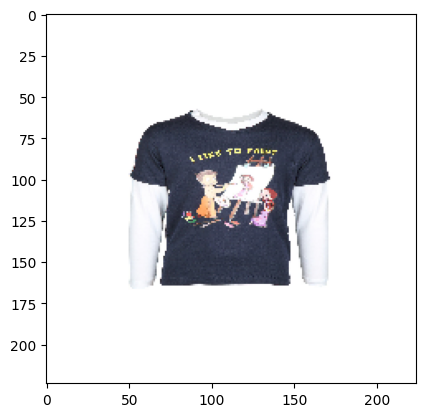

similarity score :  0.761803


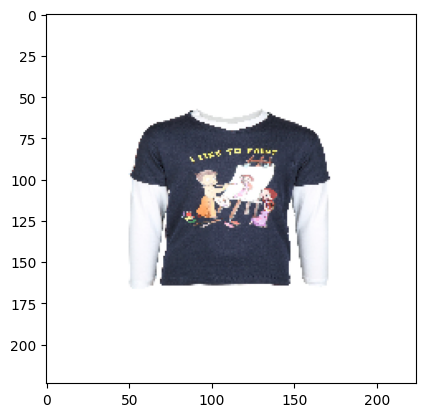

similarity score :  0.76101756


In [30]:
retrieve_most_similar_products(files[2583])

-----------------------------------------------------------------------
original product:


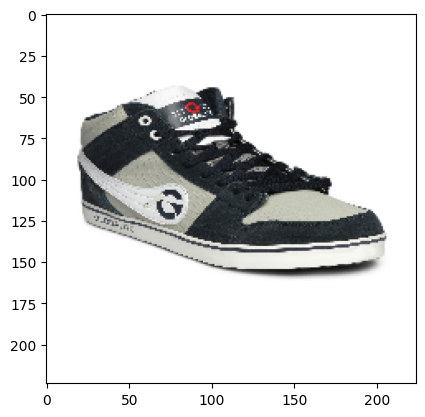

-----------------------------------------------------------------------
most similar products:


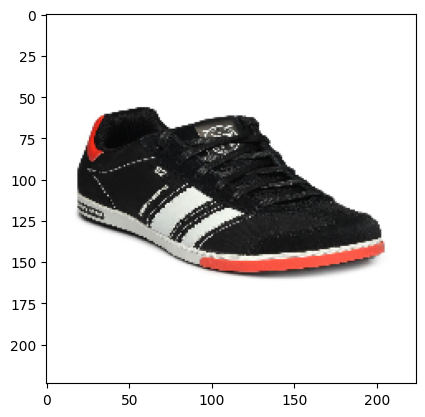

similarity score :  0.8567186


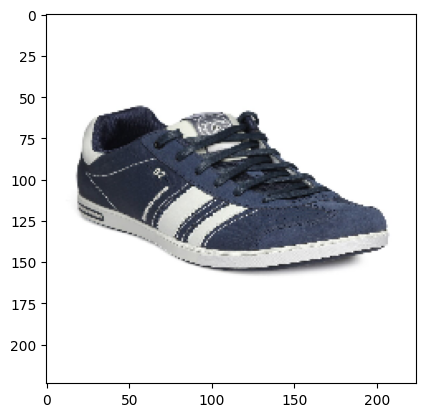

similarity score :  0.8546056


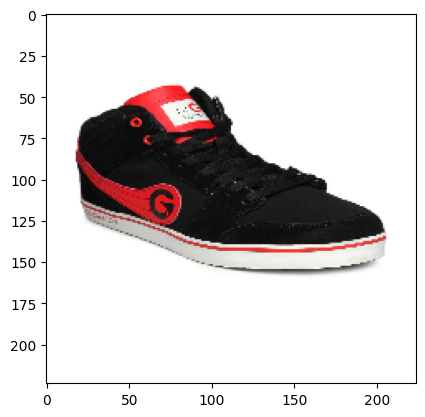

similarity score :  0.8398201


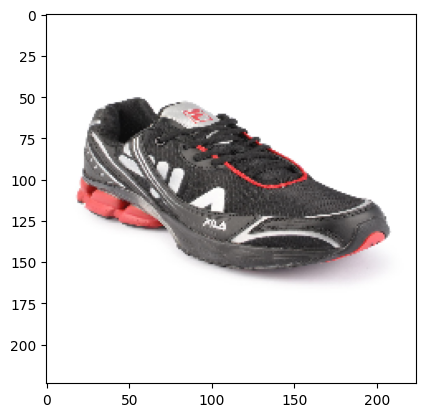

similarity score :  0.8314899


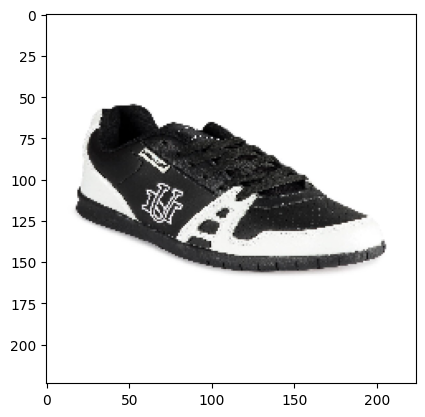

similarity score :  0.83058584


In [19]:
retrieve_most_similar_products(files[10])